In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df = pd.read_csv("fitness_app_user_data.csv")
df.head()

,User_ID,Date,Day_of_Week,Steps,Calories_Burned,Workout_Duration_Min,Heart_Rate_Avg,Workout_Type,Workout_Done
0,1,2024-01-01,Monday,16795,281,26,157,Rest Day,False
1,2,2024-01-02,Tuesday,1860,953,106,62,Strength,True
2,3,2024-01-03,Wednesday,6390,219,75,96,HIIT,True
3,4,2024-01-04,Thursday,12964,401,87,102,Yoga,True
4,5,2024-01-05,Friday,12284,564,62,99,Yoga,True


In [5]:
df.info()
df.describe()
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   User_ID               500 non-null    int64 
 1   Date                  500 non-null    object
 2   Day_of_Week           500 non-null    object
 3   Steps                 500 non-null    int64 
 4   Calories_Burned       500 non-null    int64 
 5   Workout_Duration_Min  500 non-null    int64 
 6   Heart_Rate_Avg        500 non-null    int64 
 7   Workout_Type          500 non-null    object
 8   Workout_Done          500 non-null    bool  
dtypes: bool(1), int64(5), object(3)
memory usage: 31.9+ KB


User_ID                 0
Date                    0
Day_of_Week             0
Steps                   0
Calories_Burned         0
Workout_Duration_Min    0
Heart_Rate_Avg          0
Workout_Type            0
Workout_Done            0
dtype: int64

In [6]:
df['Workout_Type'].value_counts()

Workout_Type
Cardio      148
Strength    135
Yoga        103
HIIT         73
Rest Day     41
Name: count, dtype: int64

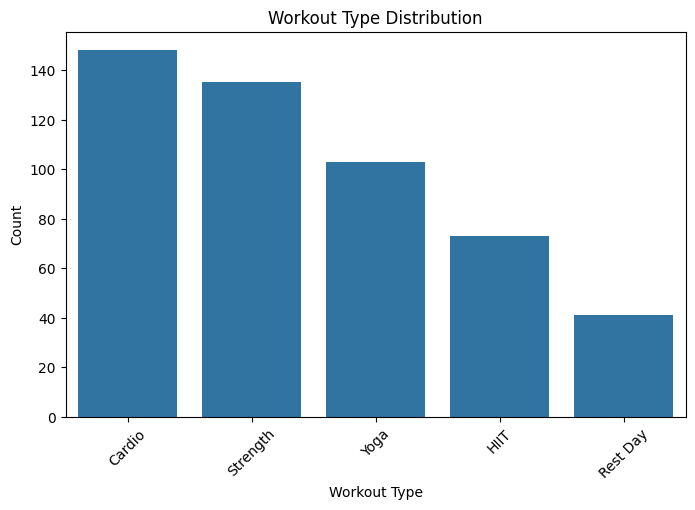

In [7]:
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='Workout_Type', order=df['Workout_Type'].value_counts().index)
plt.title("Workout Type Distribution")
plt.xlabel("Workout Type")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()

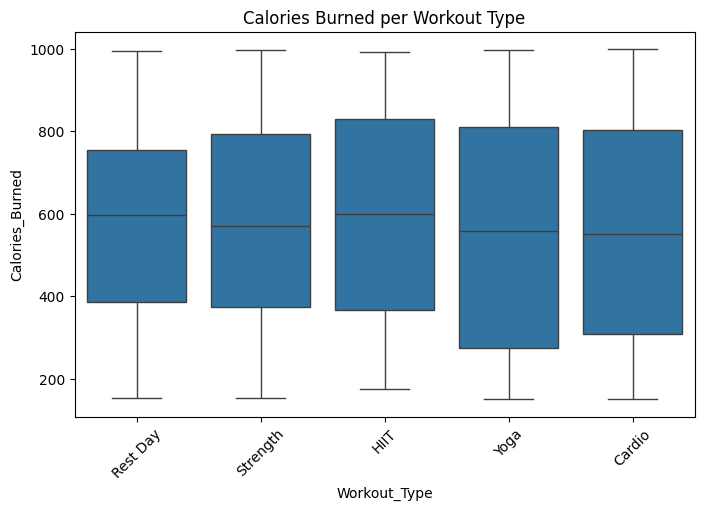

In [8]:
plt.figure(figsize=(8, 5))
sns.boxplot(data=df, x='Workout_Type', y='Calories_Burned')
plt.title("Calories Burned per Workout Type")
plt.xticks(rotation=45)
plt.show()

C:\Users\MOHONA ROY\AppData\Local\Temp\ipykernel_20672\1481488555.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df, x='Day_of_Week', y='Steps', estimator='mean', ci=None)


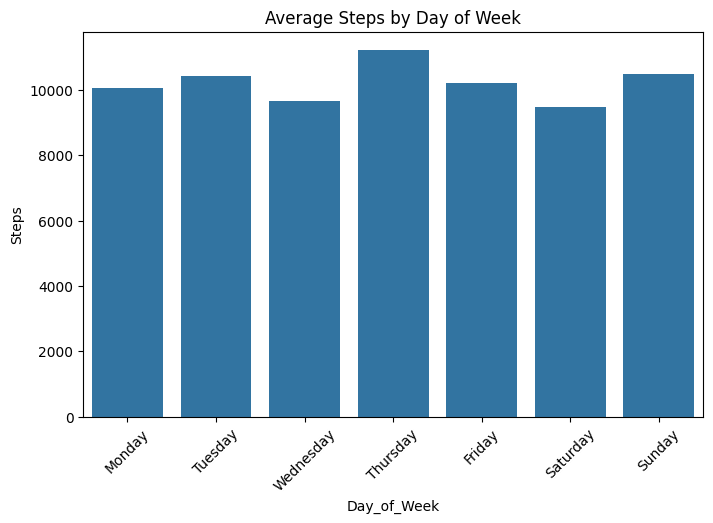

In [9]:
plt.figure(figsize=(8, 5))
sns.barplot(data=df, x='Day_of_Week', y='Steps', estimator='mean', ci=None)
plt.title("Average Steps by Day of Week")
plt.xticks(rotation=45)
plt.show()

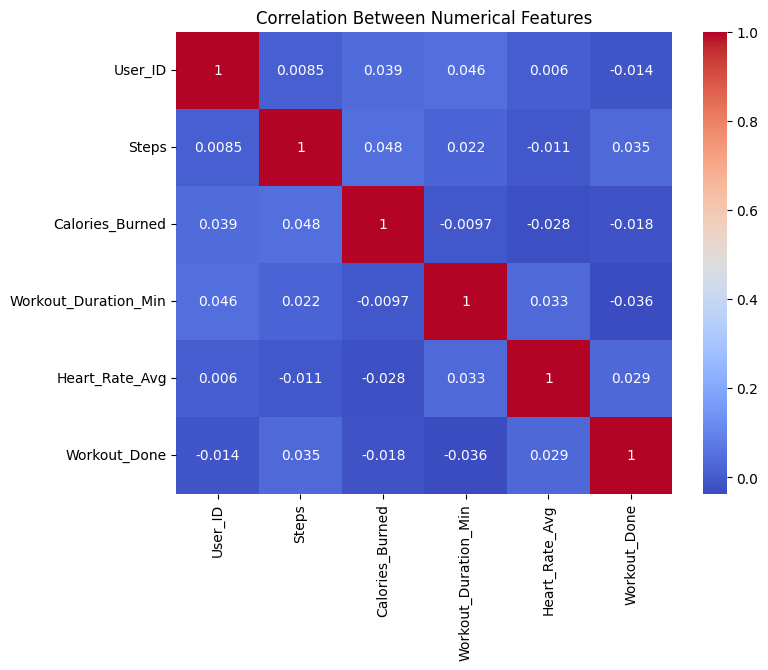

In [10]:
plt.figure(figsize=(8, 6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap="coolwarm")
plt.title("Correlation Between Numerical Features")
plt.show()

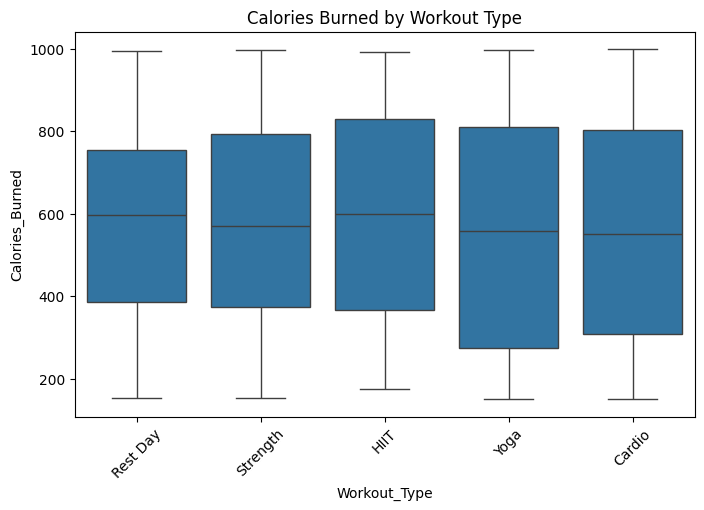

Workout_Type
HIIT        596.835616
Rest Day    585.292683
Strength    576.888889
Cardio      558.243243
Yoga        549.650485
Name: Calories_Burned, dtype: float64

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 5))
sns.boxplot(data=df, x='Workout_Type', y='Calories_Burned')
plt.title("Calories Burned by Workout Type")
plt.xticks(rotation=45)
plt.show()

# Also get the average calories burned per type
df.groupby('Workout_Type')['Calories_Burned'].mean().sort_values(ascending=False)

C:\Users\MOHONA ROY\AppData\Local\Temp\ipykernel_20672\2968465852.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df, x='Day_of_Week', y='Steps', estimator='mean', ci=None, order=[


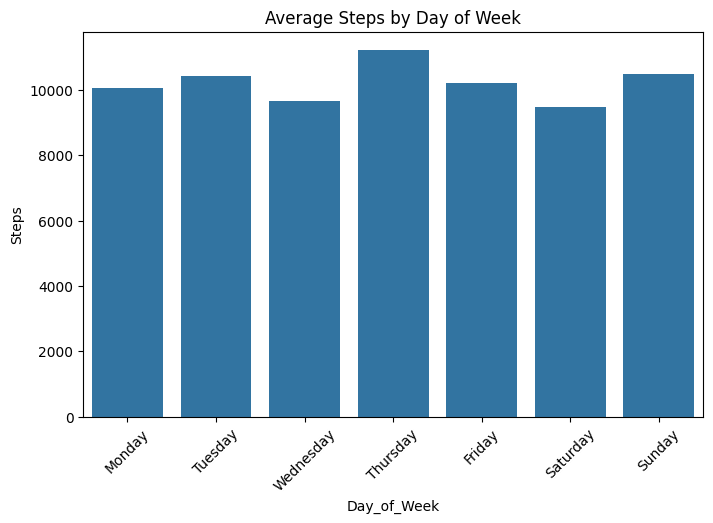

C:\Users\MOHONA ROY\AppData\Local\Temp\ipykernel_20672\2968465852.py:12: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df, x='Day_of_Week', y='Calories_Burned', estimator='mean', ci=None, order=[


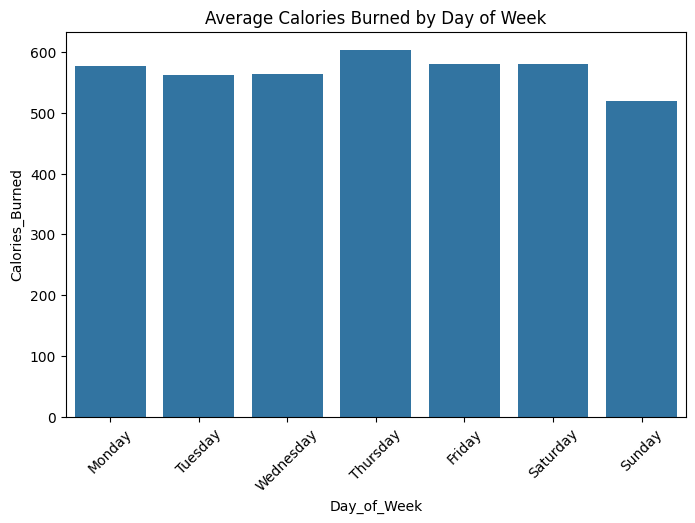

In [12]:
# Average steps by day
plt.figure(figsize=(8, 5))
sns.barplot(data=df, x='Day_of_Week', y='Steps', estimator='mean', ci=None, order=[
    'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'
])
plt.title("Average Steps by Day of Week")
plt.xticks(rotation=45)
plt.show()

# Average calories burned by day
plt.figure(figsize=(8, 5))
sns.barplot(data=df, x='Day_of_Week', y='Calories_Burned', estimator='mean', ci=None, order=[
    'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'
])
plt.title("Average Calories Burned by Day of Week")
plt.xticks(rotation=45)
plt.show()

In [13]:
df.groupby('Workout_Type')['Heart_Rate_Avg'].mean().sort_values(ascending=False)

Workout_Type
Strength    111.266667
HIIT        110.972603
Cardio      110.060811
Yoga        109.728155
Rest Day    107.365854
Name: Heart_Rate_Avg, dtype: float64

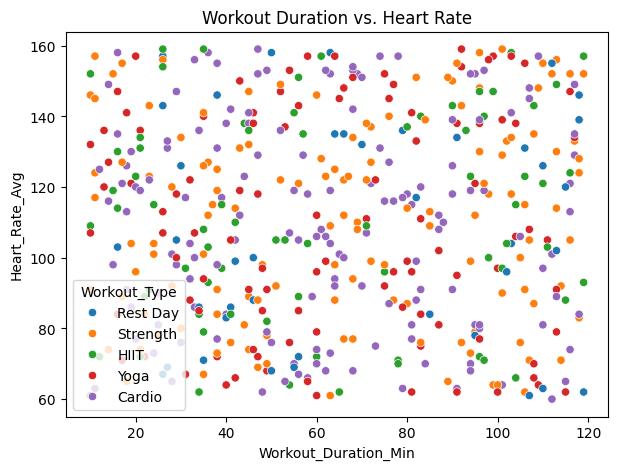

,Workout_Duration_Min,Heart_Rate_Avg
Workout_Duration_Min,1.000000,0.032568
Heart_Rate_Avg,0.032568,1.000000


In [14]:
plt.figure(figsize=(7, 5))
sns.scatterplot(data=df, x='Workout_Duration_Min', y='Heart_Rate_Avg', hue='Workout_Type')
plt.title("Workout Duration vs. Heart Rate")
plt.show()

# Correlation value
df[['Workout_Duration_Min', 'Heart_Rate_Avg']].corr()